<a id="A"></a>
# <div style="text-align:center; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:140%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Coca-Cola Stock Price - An Exploratory Data Analysis </b></div>


![coca_cola](https://images.pexels.com/photos/4113663/pexels-photo-4113663.jpeg)
[Pexels.com](https://www.pexels.com) | Photo Of Bottled Soft Drinks Beside Glasses by alleksana

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Import Dependencies </b></div>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
fig_size = [13, 7]

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Dataset Assembling </b></div>

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Load Dataset  </span>

In [42]:
df = pd.read_csv("../datasets/raw/Coca_Cola_historical_data.csv")

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Datetime Conversion and Sorting  </span>

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Quick Observation  </span>

In [44]:
df.head()

,Open,High,Low,Close,Volume,ticker,name
Date,,,,,,,
1962-01-02 00:00:00-05:00,0.045368,0.046604,0.045368,0.045368,806400,KO,The Coca-Cola Company (KO) Historical Data
1962-01-03 00:00:00-05:00,0.044695,0.044695,0.043684,0.044358,1574400,KO,The Coca-Cola Company (KO) Historical Data
1962-01-04 00:00:00-05:00,0.044470,0.045032,0.044470,0.044695,844800,KO,The Coca-Cola Company (KO) Historical Data
1962-01-05 00:00:00-05:00,0.044695,0.045256,0.043572,0.043684,1420800,KO,The Coca-Cola Company (KO) Historical Data
1962-01-08 00:00:00-05:00,0.043347,0.043347,0.042392,0.043235,2035200,KO,The Coca-Cola Company (KO) Historical Data


In [45]:
df.tail()

,Open,High,Low,Close,Volume,ticker,name
Date,,,,,,,
2025-10-13 00:00:00-04:00,66.230003,66.800003,66.000000,66.800003,13690000,KO,The Coca-Cola Company (KO) Historical Data
2025-10-14 00:00:00-04:00,66.870003,67.570000,66.750000,67.510002,14245600,KO,The Coca-Cola Company (KO) Historical Data
2025-10-15 00:00:00-04:00,67.269997,67.720001,66.919998,67.080002,11193700,KO,The Coca-Cola Company (KO) Historical Data
2025-10-16 00:00:00-04:00,67.180000,68.110001,67.160004,67.589996,15707200,KO,The Coca-Cola Company (KO) Historical Data
2025-10-17 00:00:00-04:00,68.000000,68.500000,67.800003,68.440002,15531600,KO,The Coca-Cola Company (KO) Historical Data


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Data Inspection </b></div>

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Data Summary  </span>

In [46]:
df.describe()

,Open,High,Low,Close,Volume
count,16057.000000,16057.000000,16057.000000,16057.000000,1.605700e+04
mean,13.115615,13.215419,13.013003,13.118032,9.390436e+06
std,17.125877,17.242069,17.004588,17.126951,7.959269e+06
min,0.033701,0.033815,0.031648,0.033587,7.680000e+04
25%,0.221271,0.223151,0.219731,0.221348,3.168000e+06
50%,4.804174,4.843527,4.762158,4.804176,8.179200e+06
75%,17.594805,17.727165,17.474753,17.607119,1.338220e+07
max,72.307406,73.292796,71.854138,72.819817,1.241690e+08


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Data Types  </span>

In [47]:
print(f'Unique data types: {df.dtypes.unique().tolist()}')

Unique data types: [dtype('float64'), dtype('int64'), dtype('O')]


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Dataset Shape </span>

In [48]:
print(f'Shape of Dataframe: {df.shape}')

Shape of Dataframe: (16057, 7)


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Dataset Information </span>

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16057 entries, 1962-01-02 00:00:00-05:00 to 2025-10-17 00:00:00-04:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    16057 non-null  float64
 1   High    16057 non-null  float64
 2   Low     16057 non-null  float64
 3   Close   16057 non-null  float64
 4   Volume  16057 non-null  int64  
 5   ticker  16057 non-null  object 
 6   name    16057 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1003.6+ KB


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Quantative Characteristics </span>

In [50]:
df.select_dtypes(include=[np.number]).describe()

,Open,High,Low,Close,Volume
count,16057.000000,16057.000000,16057.000000,16057.000000,1.605700e+04
mean,13.115615,13.215419,13.013003,13.118032,9.390436e+06
std,17.125877,17.242069,17.004588,17.126951,7.959269e+06
min,0.033701,0.033815,0.031648,0.033587,7.680000e+04
25%,0.221271,0.223151,0.219731,0.221348,3.168000e+06
50%,4.804174,4.843527,4.762158,4.804176,8.179200e+06
75%,17.594805,17.727165,17.474753,17.607119,1.338220e+07
max,72.307406,73.292796,71.854138,72.819817,1.241690e+08


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Qualitative Characteristics </span>

In [51]:
df.select_dtypes(exclude=[np.number]).describe()

,ticker,name
count,16057,16057
unique,1,1
top,KO,The Coca-Cola Company (KO) Historical Data
freq,16057,16057


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Exploratory Data Analysis </b></div>

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Column Normalization </span>

In [52]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'ticker', 'name'], dtype='object')

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Visualization of Missing Values </span>

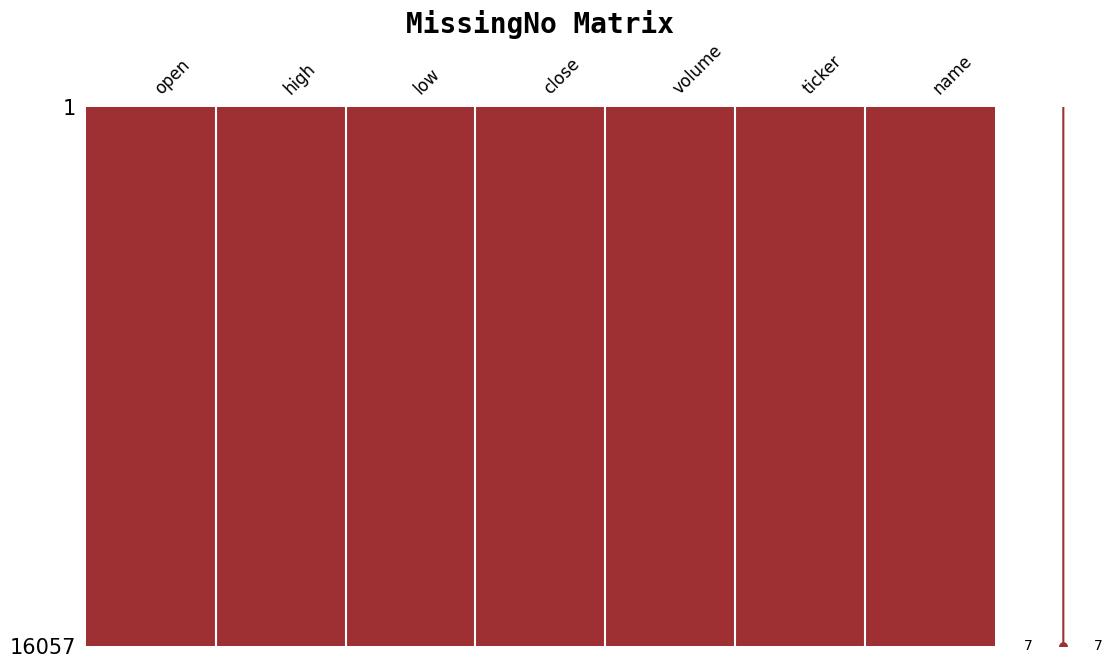

In [53]:
def plot_msno_matrix(data, color):
    msno.matrix(data, color=color, figsize=fig_size, fontsize=12)
    plt.title("MissingNo Matrix", fontsize=20, fontweight='bold', family='monospace')
    plt.show()

plot_msno_matrix(df, (0.62, 0.19, 0.20))

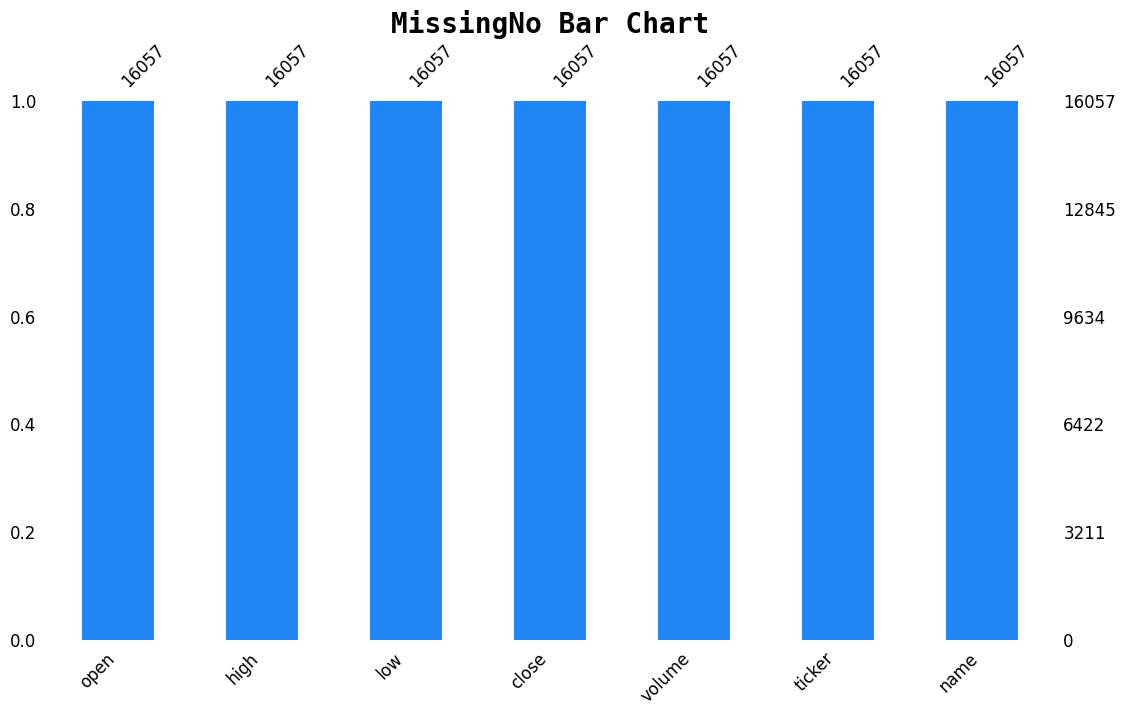

In [54]:
def plot_msno_bar(data, color):
    msno.bar(data, color=color, figsize=fig_size, fontsize=12)
    plt.title("MissingNo Bar Chart", fontsize=20, fontweight='bold', family='monospace')
    plt.show()

plot_msno_bar(df, (0.12, 0.52, 0.95))


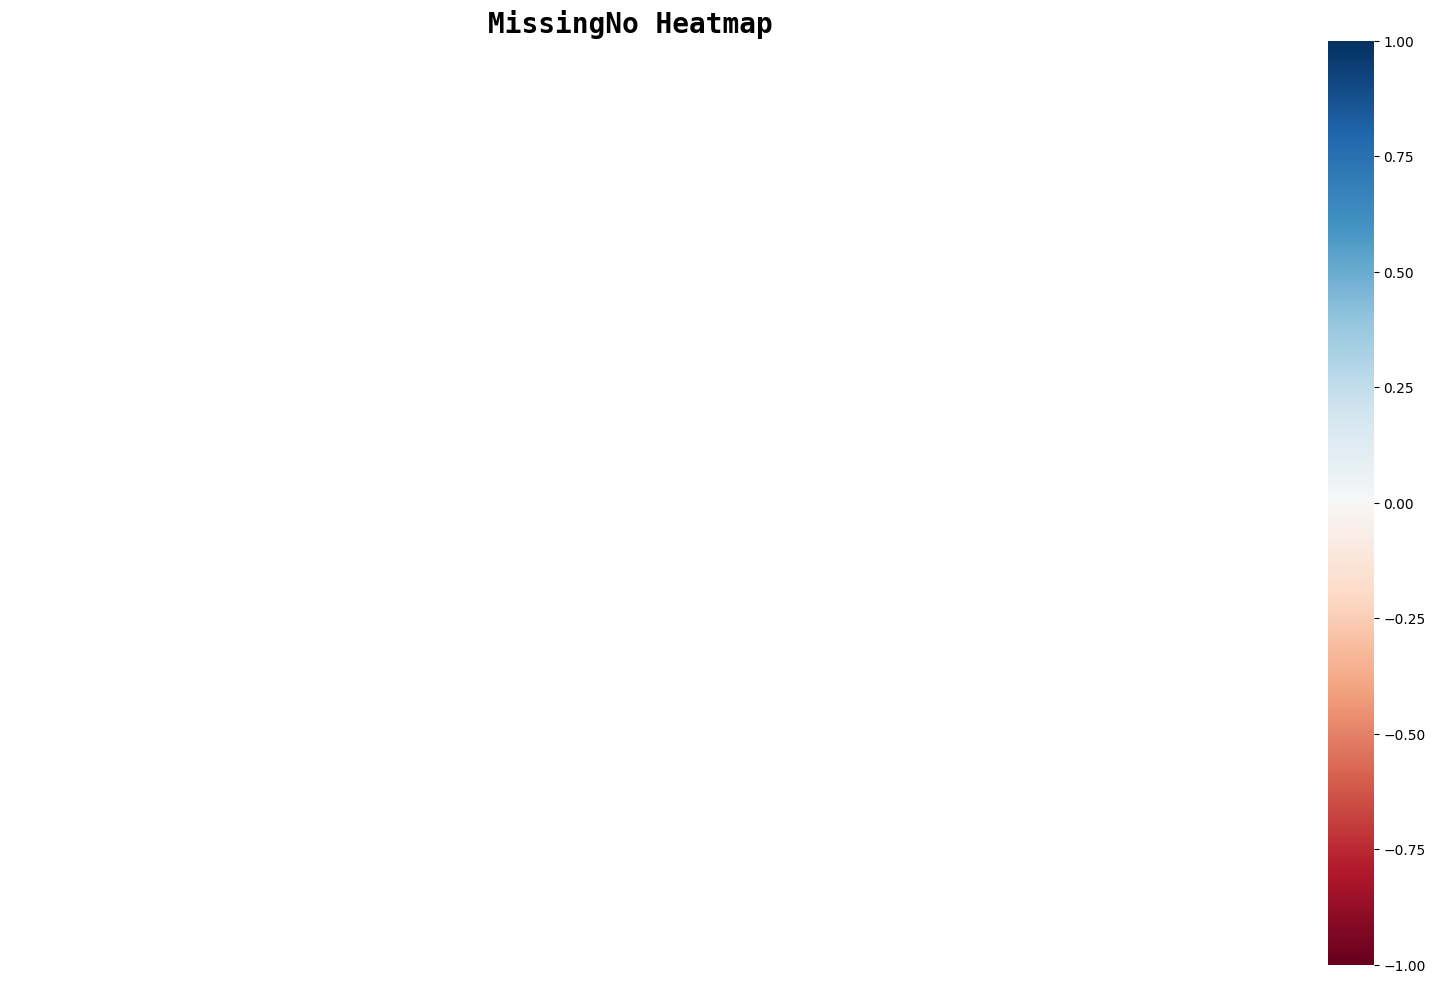

In [55]:
def plot_msno_heat(data):
    msno.heatmap(data)
    plt.title("MissingNo Heatmap", fontsize=20, fontweight='bold', family='monospace')
    plt.show()

plot_msno_heat(df)

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observations on the MissingNo graphs: </b> <br>
• The Matrix displays visualizes solid bars with full feature counts. <br>
• The Bar Plot confirms the 16057 samples with no missing rows. <br>
• The Heatmap shows empty, further establishing the fact that there are no columns with missing values in the dataset. <br>
• In conclusion, the graphs provide a robust confirmation that the dataset is spotless. <br>
</span>

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Consistency and Data Quality Check </span>

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> The following Red Flags must be considered: </b> <br>
• Invalid prices. <br>
• Negative values for the volume attribute. <br>
• low > high values. <br>
• violating the ‘close’ range condition: low <= close <= high. <br>
• violating the ‘open range condition: low <= open <= high. <br>
• outliers or sudden shifts. <br>
</span>

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Observe Missing Values with percentage  </span>

In [56]:
print(df.isna().sum(), "\n")
print((df.isna().sum() / len(df)) * 100)

open      0
high      0
low       0
close     0
volume    0
ticker    0
name      0
dtype: int64 

open      0.0
high      0.0
low       0.0
close     0.0
volume    0.0
ticker    0.0
name      0.0
dtype: float64


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Check for duplicates based on Date index </span>

In [57]:
df[df.index.duplicated(keep=False)]

,open,high,low,close,volume,ticker,name
Date,,,,,,,


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Inspect Valid Data Ranges  </span>


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,16057.0,1.311562e+01,1.712588e+01,0.033701,2.212715e-01,4.804174e+00,1.759480e+01,7.230741e+01
high,16057.0,1.321542e+01,1.724207e+01,0.033815,2.231513e-01,4.843527e+00,1.772716e+01,7.329280e+01
low,16057.0,1.301300e+01,1.700459e+01,0.031648,2.197309e-01,4.762158e+00,1.747475e+01,7.185414e+01
close,16057.0,1.311803e+01,1.712695e+01,0.033587,2.213482e-01,4.804176e+00,1.760712e+01,7.281982e+01
volume,16057.0,9.390436e+06,7.959269e+06,76800.000000,3.168000e+06,8.179200e+06,1.338220e+07,1.241690e+08


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Evaluate Logical Relationships </span>
<br>
<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> The core logical conditions must be met: <br> </b>
• High cannot be lower than Low. <br>
• Open and Close cannot be a negative value. <br> <br>
Additionally, since the "Close" and "Open" prices are observations within the total range of trades executed during the day, it must satisfy the following conditions: <br>
• low <= close <= high. <br>
• low <= open <= high. <br>
Therefore, we need to check if Close or Open are outside the High-Low range.
</span>

In [59]:
def check_logical_consistency(data):
    inconsistent_ohlc = data[(data['high'] < data['low']) | (data['open'] < 0) | (data['close'] < 0) |
                         (data['close'] < data['low']) | (data['close'] > data['high']) |
                         (data['open'] < data['low']) | (data['open'] > data['high'])]
    
    if not inconsistent_ohlc.empty:
        print(f"WARNING: Detected {len(inconsistent_ohlc)} rows with Open/Close outside the High-Low range.")
    else:
        print("OHLCV range is logically consistent.")

check_logical_consistency(df)

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observation: <br> </b>
• The method discovered 34 logical inconsistencies, which needs to be addressed individually.
</span>

In [60]:
# Locating the prices of 'Close' that are greater than 'High'
close_greater_than_high = df[(df['close'] > df['high'])]

print(f"Detected {len(close_greater_than_high)} discrepancies.")
close_greater_than_high

Detected 22 discrepancies.


,open,high,low,close,volume,ticker,name
Date,,,,,,,
1978-03-14 00:00:00-05:00,0.195412,0.196063,0.194760,0.196063,1972800,KO,The Coca-Cola Company (KO) Historical Data
1978-05-11 00:00:00-04:00,0.212999,0.219512,0.208439,0.219512,5865600,KO,The Coca-Cola Company (KO) Historical Data
1980-12-02 00:00:00-05:00,0.183582,0.184337,0.182071,0.184337,8851200,KO,The Coca-Cola Company (KO) Historical Data
1982-07-12 00:00:00-04:00,0.242488,0.245844,0.242488,0.245844,12628800,KO,The Coca-Cola Company (KO) Historical Data
1982-07-14 00:00:00-04:00,0.244166,0.245844,0.242488,0.245844,12628800,KO,The Coca-Cola Company (KO) Historical Data
1988-06-17 00:00:00-04:00,0.970283,0.979890,0.957474,0.979890,21062400,KO,The Coca-Cola Company (KO) Historical Data
1988-06-21 00:00:00-04:00,0.963879,0.979890,0.960676,0.979890,7769600,KO,The Coca-Cola Company (KO) Historical Data
1988-07-15 00:00:00-04:00,0.960676,0.979890,0.960676,0.979890,11734400,KO,The Coca-Cola Company (KO) Historical Data
1988-07-29 00:00:00-04:00,0.967081,0.983093,0.960677,0.983093,18904000,KO,The Coca-Cola Company (KO) Historical Data


<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observation: <br> </b>
• 22 logical inconsistencies found from the first check. However, upon manual inspection, 'Close' and 'High' values are the same, creating a paradox.
</span>

In [61]:
# Locating the prices of 'Close' that are less than 'Low'
close_lower_than_low = df[(df['close'] < df['low'])]

print(f"Detected {len(close_lower_than_low)} discrepancies.")
close_lower_than_low

Detected 12 discrepancies.


,open,high,low,close,volume,ticker,name
Date,,,,,,,
1979-01-12 00:00:00-05:00,0.243653,0.247680,0.243653,0.243653,4252800,KO,The Coca-Cola Company (KO) Historical Data
1979-01-16 00:00:00-05:00,0.246338,0.246338,0.243653,0.243653,3052800,KO,The Coca-Cola Company (KO) Historical Data
1979-04-27 00:00:00-05:00,0.217295,0.217975,0.215258,0.215258,1396800,KO,The Coca-Cola Company (KO) Historical Data
1979-05-03 00:00:00-04:00,0.212542,0.215937,0.211863,0.211863,4488000,KO,The Coca-Cola Company (KO) Historical Data
1979-08-30 00:00:00-04:00,0.220661,0.220661,0.219286,0.219286,1248000,KO,The Coca-Cola Company (KO) Historical Data
1979-09-19 00:00:00-04:00,0.213713,0.215802,0.211625,0.211625,4948800,KO,The Coca-Cola Company (KO) Historical Data
1980-07-09 00:00:00-04:00,0.197444,0.204757,0.197444,0.197444,6336000,KO,The Coca-Cola Company (KO) Historical Data
1980-11-26 00:00:00-05:00,0.186603,0.188870,0.185093,0.185093,11740800,KO,The Coca-Cola Company (KO) Historical Data
2003-02-24 00:00:00-05:00,10.402111,10.402111,10.194734,10.194734,8390400,KO,The Coca-Cola Company (KO) Historical Data


<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observation: <br> </b>
• The second check reveals 12 more logical inconsistencies. Once again, upon manual inspection, the 'Close' and 'Low' values are the same.
</span>

In [62]:
# Locating the prices of 'Open' that are greater than 'High'
open_greater_than_high = df[(df['open'] > df['high'])]

print(f"Detected {len(open_greater_than_high)} discrepancies.")
open_greater_than_high

Detected 0 discrepancies.


,open,high,low,close,volume,ticker,name
Date,,,,,,,


In [63]:
# Locating the prices of 'Open' that are less than 'Low'
open_lower_than_low = df[(df['open'] < df['low'])]

print(f"Detected {len(open_lower_than_low)} discrepancies.")
open_lower_than_low

Detected 0 discrepancies.


,open,high,low,close,volume,ticker,name
Date,,,,,,,


<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observation: <br> </b>
• 22 + 12 + 0 + 0 = 34, which matches the previous method. This is likely a floating-point precision issue, not a fundamental logical flaw in the market data, which can be resolved by rounding the data to a standard number of decimal places (e.g., 4).
</span>

In [64]:
# Ticker, Name, and Volume should be excluded.
price_cols = ['open', 'high', 'low', 'close']
df[price_cols] = df[price_cols].round(4)

In [65]:
# Re-run the previous method to check if the issue is resolved.
check_logical_consistency(df)

OHLCV range is logically consistent.


<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
This solves the data precision issues. </span>

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Time Plots of Close prices and Volume </span> <br>
<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
Identify points that deviate significantly from the surrounding trends. </span>

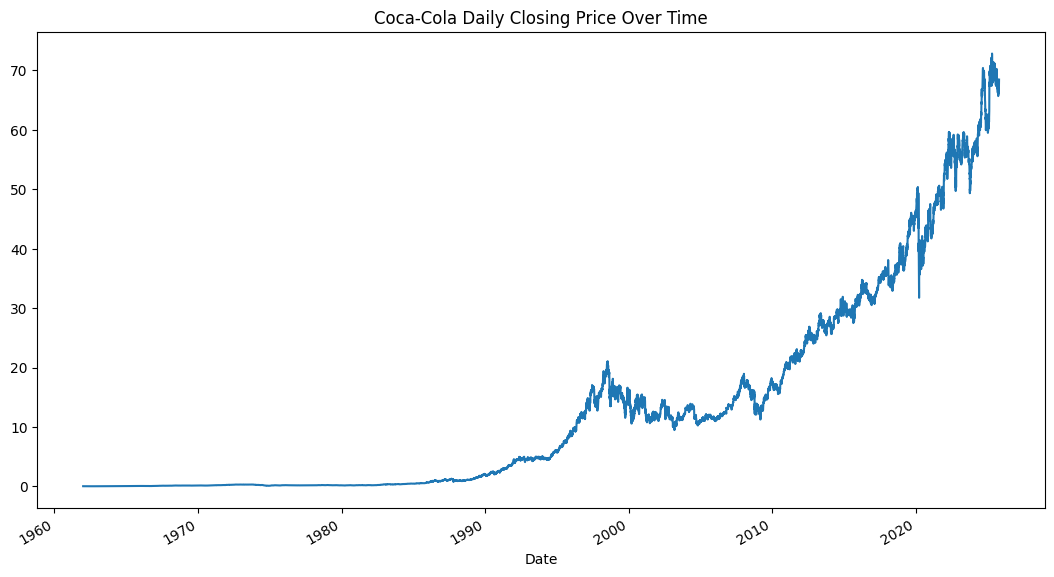

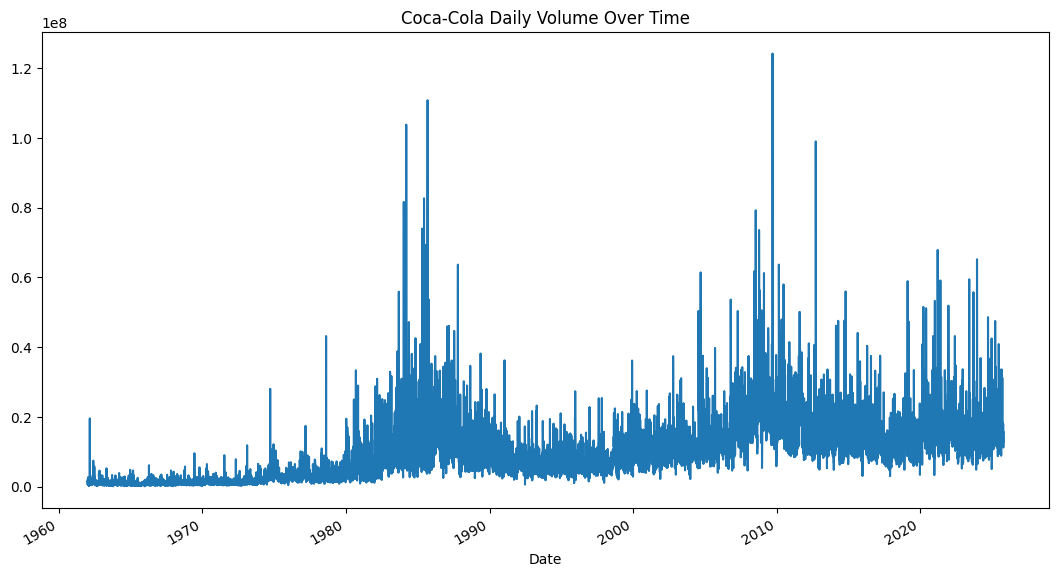

In [66]:
def plot_time_graph(feature, title):
    plt.figure(figsize=fig_size)
    feature.plot(title=title)
    plt.show()

plot_time_graph(df['close'], 'Coca-Cola Daily Closing Price Over Time')
plot_time_graph(df['volume'], 'Coca-Cola Daily Volume Over Time')

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> • Observation on the Daily closing price: </b> The graph clearly shows the non-stationary nature of the stock price, exhibiting strong growth over the 60+ year period, increasing from near 0 in the <b>1960s</b> to over 70 most recently. This upward trend is the primary reason the ADF test confirmed non-stationarity in the price series. <br>
1. The <b>1960s–1980s</b> experiences decades of flatness where the price remained very low, indicative of a much smaller market. <br>
2. The <b>1990s </b> is where the first major growth spurt takes place, peaking around the year 2000. <br>
3. In the <b>2000s</b>, the price experiences a significant plateau and fluctuation, remaining largely between $10 and $20 for roughly a decade post-2000, before resuming its upward trajectory. <br>
4.<b>Post-2010</b>, a strong, smooth, and accelerating growth pattern is visible, culminating in the highest recent values. <br> <br>
<b> • Observation on the Volume: </b> The time period graph displays periods of high and low liquidity. <br>
1. In the <b>1960s–1970s</b>, the Volume is extremely low and stable in the earliest years. <br>
2. In the <b>1980s–1990s</b>, extreme, frequent, and sometimes massive spikes in Volume occur, particularly prominent around the late 1980s, which likely corresponds to stock splits, major news, or structural changes in the market. <br>
3. The Volume volatility continues <b>post-2000</b>, with pronounced spikes around 2010 and again in the 2020s. <br>
</span>

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Rolling Statistics (Mean and Standard Deviation): </b> <br>
• Calculating a rolling mean and standard deviation to see if any points fall many standard deviations away from their local neighborhood average <br>
$$\text{Daily Return} = \frac{\text{Close}_t - \text{Close}_{t-1}}{\text{Close}_{t-1}} \times 100$$ <br>
</span>

In [67]:
df['daily_return'] = df['close'].pct_change() * 100

# Inspect returns greater than a specific threshold (e.g., 5-10 standard deviations)
rolling_std = df['daily_return'].rolling(window=252).std() # 252 trading days/year

def outliers_return(std):
    return df[abs(df['daily_return']) > rolling_std.mean() * std]


In [68]:
outliers_return(5).describe().T

,count,mean,std,min,25%,50%,75%,max
open,43.0,9.673688e+00,1.281283e+01,3.730000e-02,2.306500e-01,4.005900e+00,1.335065e+01,5.891370e+01
high,43.0,9.926591e+00,1.294443e+01,3.730000e-02,2.403000e-01,4.260500e+00,1.395530e+01,5.900380e+01
low,43.0,9.183951e+00,1.206238e+01,3.460000e-02,2.242000e-01,4.005900e+00,1.266200e+01,5.489730e+01
close,43.0,9.468956e+00,1.219799e+01,3.460000e-02,2.338500e-01,4.246800e+00,1.355035e+01,5.511340e+01
volume,43.0,2.652946e+07,1.805101e+07,3.456000e+06,1.236080e+07,2.027040e+07,3.923980e+07,6.364000e+07
daily_return,43.0,-3.410788e-01,9.880051e+00,-2.468941e+01,-8.675392e+00,-6.835608e+00,7.843664e+00,1.967793e+01


In [69]:
outliers_return(10).describe().T

,count,mean,std,min,25%,50%,75%,max
open,3.0,4.862467e+00,6.883169e+00,7.763000e-01,8.890000e-01,1.001700e+00,6.905550e+00,1.280940e+01
high,3.0,5.357400e+00,7.500948e+00,1.001700e+00,1.026750e+00,1.051800e+00,7.535250e+00,1.401870e+01
low,3.0,4.749033e+00,6.924409e+00,7.262000e-01,7.512500e-01,7.763000e-01,6.760450e+00,1.274460e+01
close,3.0,5.205667e+00,7.563748e+00,7.638000e-01,8.389500e-01,9.141000e-01,7.426600e+00,1.393910e+01
volume,3.0,5.260747e+07,1.013710e+07,4.370400e+07,4.709120e+07,5.047840e+07,5.705920e+07,6.364000e+07
daily_return,3.0,2.956064e+00,2.411657e+01,-2.468941e+01,-5.404868e+00,1.387968e+01,1.677880e+01,1.967793e+01


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Box Plot on Returns </span> <br>
<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
Visualize days with exceptionally high volatility. </span>


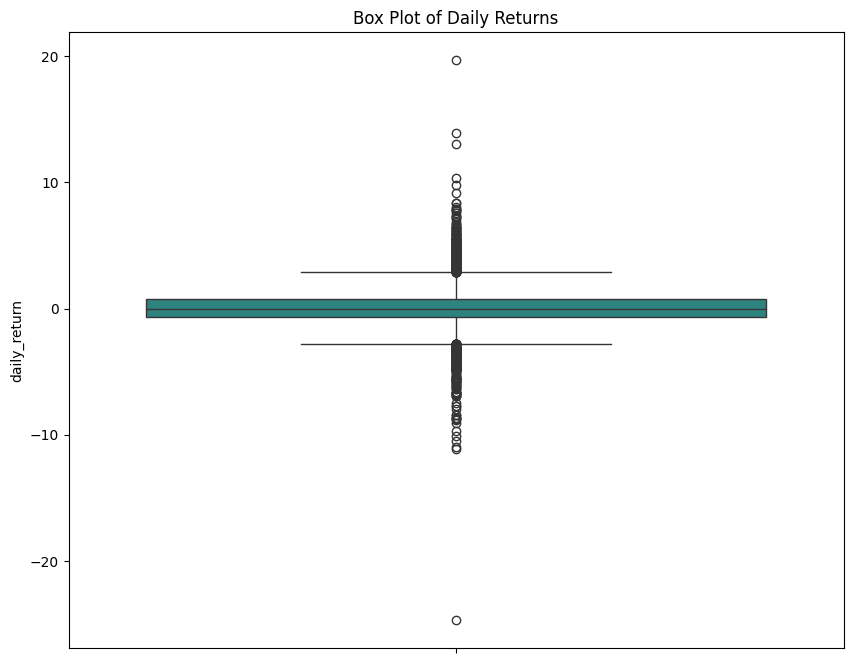

In [70]:
def plot_boxplot(feature, palette):
    plt.figure(figsize=[10, 8])
    sns.boxplot(data=feature, palette=palette)
    plt.title('Box Plot of Daily Returns')
    plt.show()

plot_boxplot(df['daily_return'], 'viridis')

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observations on the Box Plot: </b> <br>
• Most dots outside the whiskers are within a 10-value range (positive and negative), with only a few outside its range. <br>
• There are two  notable outliers: one located on +20, and the other beyond the -20 range. <br>
</span>


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Histograms </span> <br>
<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
For illustrating the data distributions. </span>


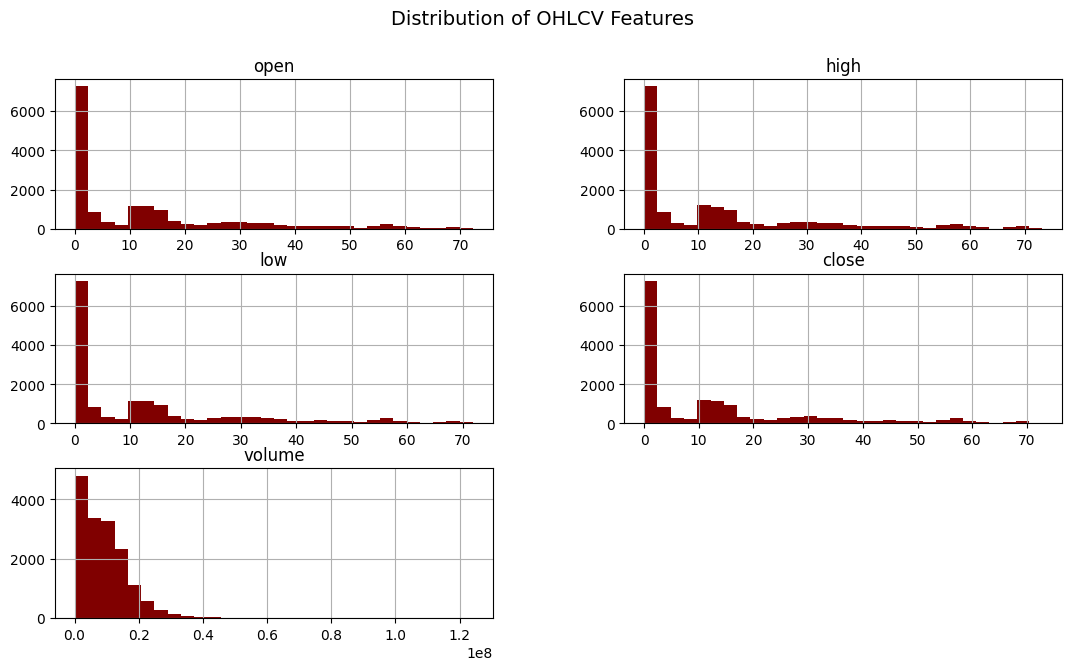

In [71]:
def plot_hist(features):
    features.hist(figsize=fig_size, bins=30, color="maroon")
    plt.suptitle("Distribution of OHLCV Features", fontsize=14)
    plt.show()

plot_hist(df[['open', 'high', 'low', 'close', 'volume']])


<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observation on the Historgram: </b> <br>
• The distributions are skewed to the left, close to zero, which could be a direct consequence of decades of price appreciation since the dataset starts from small and early prices. <br>
</span>


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Z-Score </span> <br>
<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
Statistical method to flag potential anomalies, which are data points that are unusually far from the mean. <br>
$$\text{Z-score} = \frac{\text{x} - \text{$\mu$}}{\text{$\sigma$}}$$ <br>
</span>



In [72]:
#Z-score for close price
z = (df['close'] - df['close'].mean()) / df['close'].std()
df_outliers = df[np.abs(z) > 3]
df_outliers.head()

,open,high,low,close,volume,ticker,name,daily_return
Date,,,,,,,,
2024-07-26 00:00:00-04:00,63.7041,64.7069,63.6463,64.6490,13530100,KO,The Coca-Cola Company (KO) Historical Data,1.483264
2024-07-30 00:00:00-04:00,64.0995,65.4011,63.9837,65.2565,13258000,KO,The Coca-Cola Company (KO) Historical Data,1.271942
2024-08-01 00:00:00-04:00,64.6008,65.6711,64.3116,65.5264,16495900,KO,The Coca-Cola Company (KO) Historical Data,1.827969
2024-08-02 00:00:00-04:00,66.0760,67.1752,65.2661,66.8474,22514800,KO,The Coca-Cola Company (KO) Historical Data,2.015981
2024-08-05 00:00:00-04:00,66.5196,67.0595,65.3047,65.6614,25484300,KO,The Coca-Cola Company (KO) Historical Data,-1.774190


<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observation on the Z-Score for Close Price: </b> <br>
• Z-Score detects outliers in the raw price (Close), flagging recent high-priced days since the mean price is much lower due to the long history, which is visually confirmed by the outlier graph. <br>


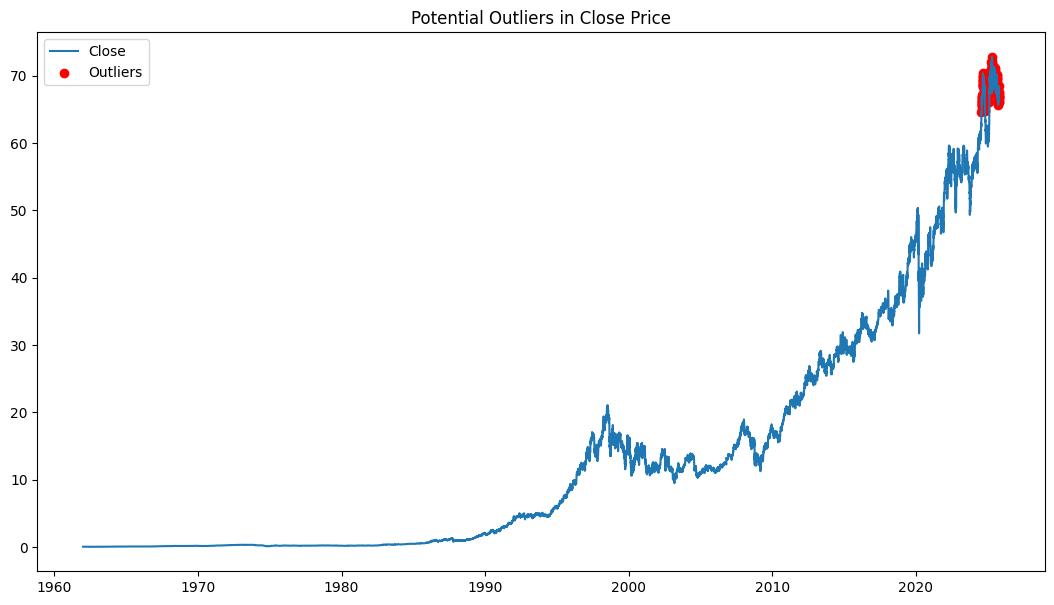

In [73]:
def plot_outlier_graph(feature, outliers):
    plt.figure(figsize=fig_size)
    plt.plot(df.index, feature, label='Close')
    plt.scatter(df_outliers.index, outliers, color='red', label='Outliers')
    plt.legend()
    plt.title("Potential Outliers in Close Price")
    plt.show()

plot_outlier_graph(df['close'], df_outliers['close'])

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observations on the Outlier Graph: </b> <br>
• The marked outlier highlights the most recent Close price spike, which supports the soaring growth over time pattern.<br>
</span>


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Time Plots of Returns </span>
<br>
<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
Displaying volatility clusters.<br>
</span> 

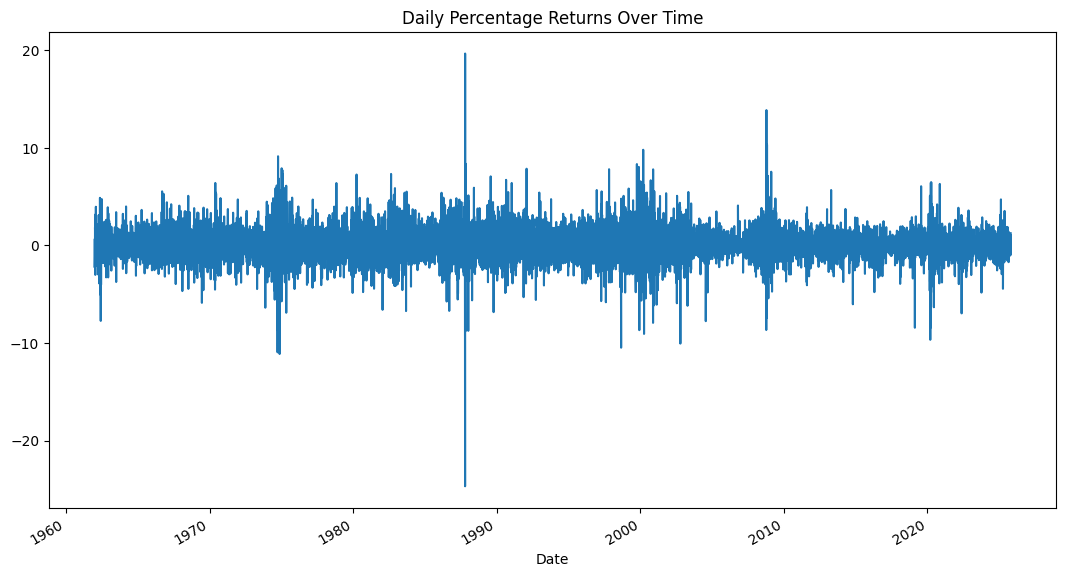

In [74]:
plot_time_graph(df['daily_return'], 'Daily Percentage Returns Over Time')


<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observations on the Returns Time Plot: </b> <br>
Six notable groups of spikes can be discovered: <br>
• A small spike in the early 1960s. <br>
• Moderate spikes in mid-1970s. <br>
• The largest spikes in late-1980s. <br>
• Minor but prolonged spikes around the year 2000. <br>
• A second largest group of spikes just before 2010. <br>
• A group of mini spikes around the 2020s. 
</span>


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Correlation & Relationships  </span>


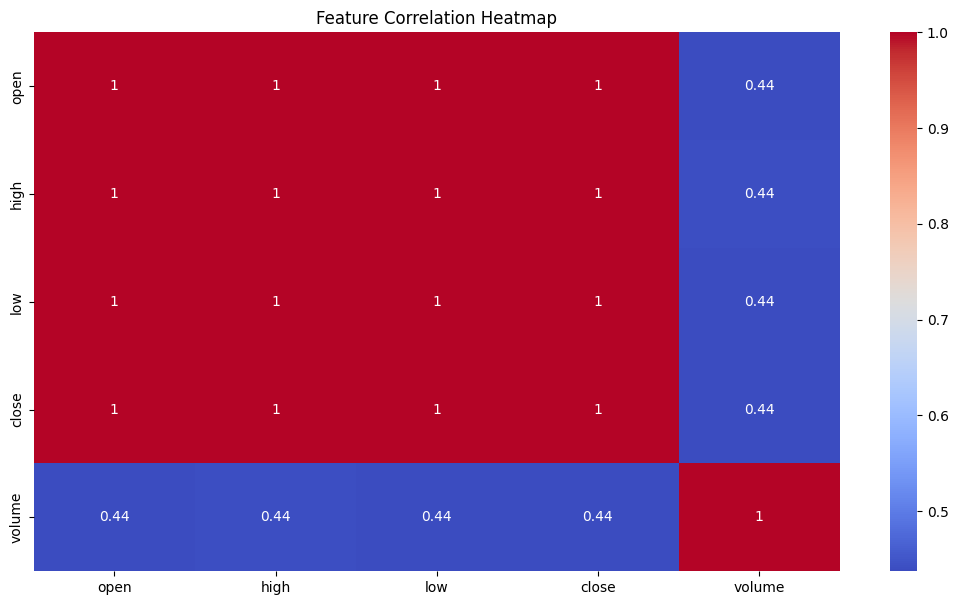

In [75]:
# Check the relations between the volume and OHLC prices
def plot_corr(features):
    plt.figure(figsize=fig_size)
    sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Heatmap")
    plt.show()

plot_corr(df[['open','high','low','close','volume']])

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observations on the Correlation Heatmap: </b> <br>
• The correlation of Open, High, Low, and Close is 1, while the correlations of volume with other features show 0.44 for all cases.
</span>

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Stationarity Check </span>
<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<br>
• Time-Series models such as ARIMA assumes that  its statistical properties are stationary. <br>
• While Price data is almost never stationary, Returns often are. <br>
• We'll apply Augmented Dickey-Fuller (ADF) Test.
</span>

In [76]:
def apply_adfuller(feature):
    adf_result = adfuller(feature.dropna())
    print(f'ADF Statistic: {adf_result[0]:.2f}')
    print(f'p-value: {adf_result[1]:.5f}')

# Interpretation: A high p-value indicates non-stationarity.
print("• ADF on Close Prices:")
apply_adfuller(df['close'])
print("• ADF on Daily Return:")
apply_adfuller(df['daily_return'])

• ADF on Close Prices:
ADF Statistic: 2.47
p-value: 0.99904
• ADF on Daily Return:
ADF Statistic: -48.40
p-value: 0.00000


<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> ADfuller Conclusion: </b> <br>
• The ADF test on the Close price yields an ADF Statistic of 2.47 and a p-value of 0.99904. Since the p-value (0.99904) is much greater than the common significance level (0.05), the closing price series is non-stationary, confirming the need for differencing or models that handle non-stationarity.
<br>
• The ADF test on the Close price yields an ADF Statistic of 0.00 and a p-value of -48.40. Since the p-value (0.00) is lower than the common significance level (0.05), the return is stationary in the mean and we reject the null hypothesis of non-stationarity.
</span>

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Rolling Mean and Standard Deviation </span>


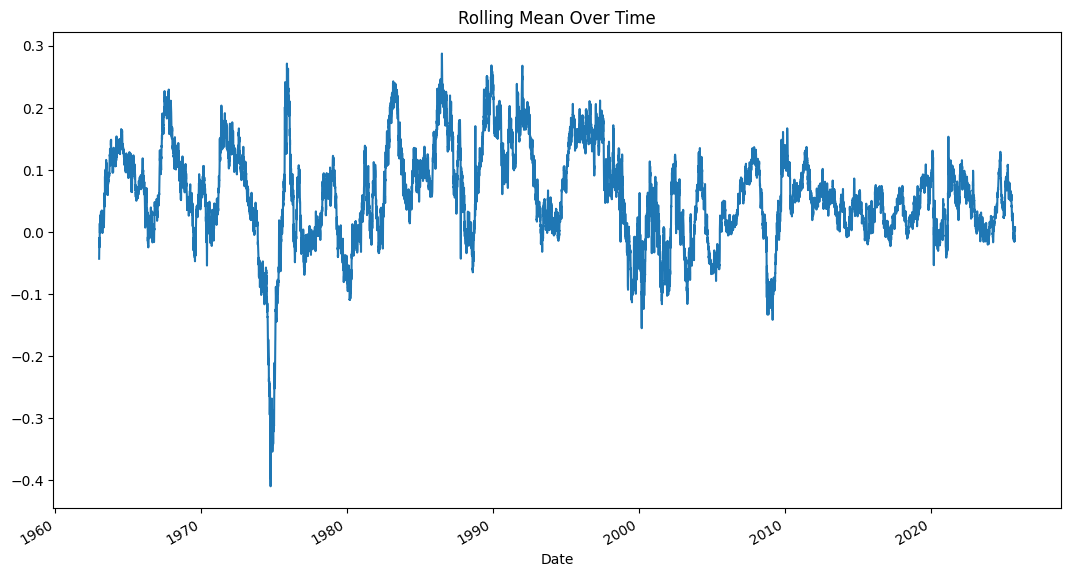

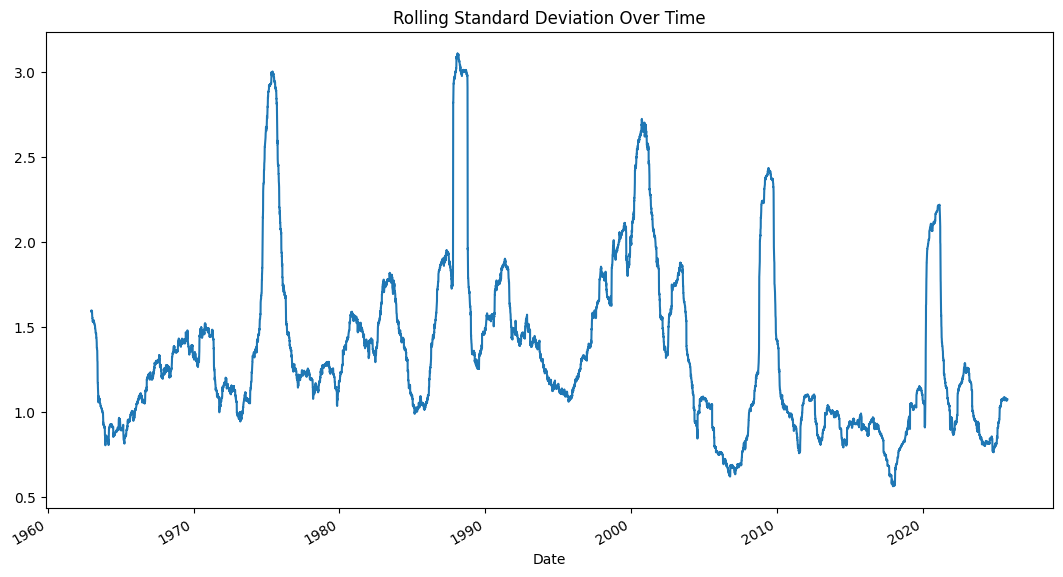

In [77]:
# A trending pattern suggest that the data is non-stationary.
plot_time_graph(df['daily_return'].rolling(window=252).mean(), 'Rolling Mean Over Time')
plot_time_graph(rolling_std, 'Rolling Standard Deviation Over Time')

# Self-Note: rolling_std is inialized in the Rolling Statistics Section

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> 
<b> Observations on the Rolling Mean Over Time Graph: </b> <br>
The Rolling Mean Over Time graph shows the 252-day rolling average of the daily percentage returns, where the mean consistently fluctuates around the horizontal axis (0.0), ranging from approximately -0.4 to +0.3. While the line shows many waves, it does not exhibit a clear long-term upward or downward trend, always reverting to a near-zero average, suggesting that the series is mean-stationary. <br> <br>
<b> Observations on the Rolling Standard Deviation Over Time Graph: </b> <br>
The Rolling Standard Deviation Over Time graph shows the 252-day rolling standard deviation of the daily returns, which measures volatility. It illustrates clear periods of high volatility (spikes near <b>1975, 1990, 2000, 2010, and 2020</b>) interspersed with periods of lower troughs. Additionally, the volatility levels vary significantly over the history of the stock. Due to these dramatic shifts of variance and clustering periods of volatility, followed by more volatility, it can be concluded that the series is heteroscedastic. <br>
</span>


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Save Dataframe </b></div>


In [78]:
# Save the cleaned dataframe (free of precision errors)

df.to_csv("../datasets/interim/coca_cola_ohlc_cleaned.csv")
print("Cleaned data saved to 'interim' directory.")

Cleaned data saved to 'interim' directory.
